In [2]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/mlproject2/insurance.csv'
ins_dataset = pd.read_csv(path)

In [4]:
ins_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# number of rows and columns
ins_dataset.shape

(1338, 7)

In [6]:
# getting some information about dataset
ins_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# categorical Feature :
# -sex
# -smoker
# -Region

In [8]:

# checking for missing values
ins_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [9]:

# statistical measure of the dataset

In [10]:
ins_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-11-fa444ff7e354>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_dataset['age'])


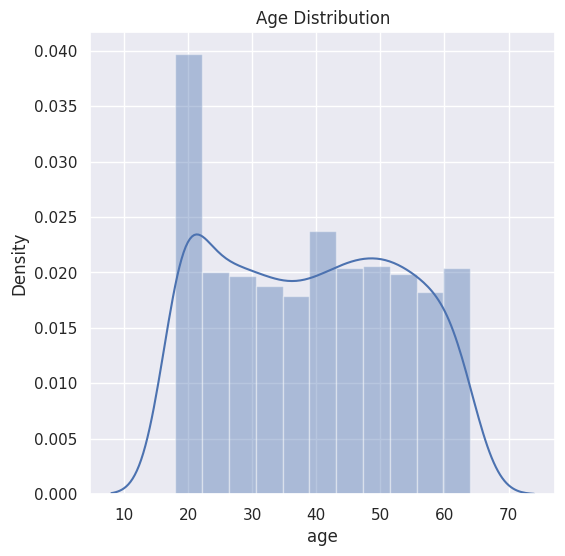

In [11]:
# distribution of values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ins_dataset['age'])
plt.title('Age Distribution')
plt.show()

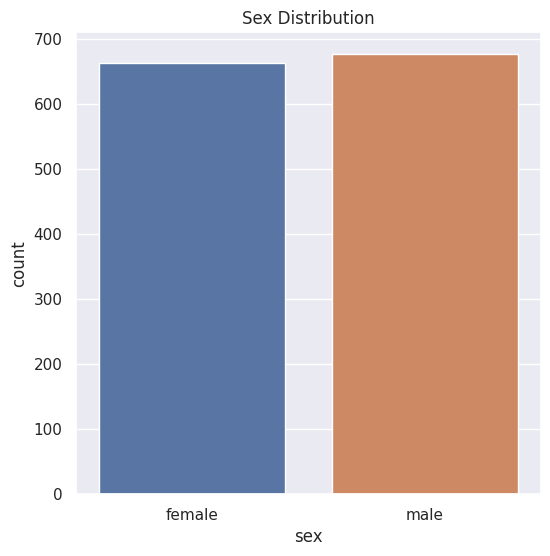

In [12]:
plt.figure(figsize=(6,6))
sns.countplot( x ='sex' , data=ins_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
ins_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-14-71b667b161a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_dataset['bmi'])


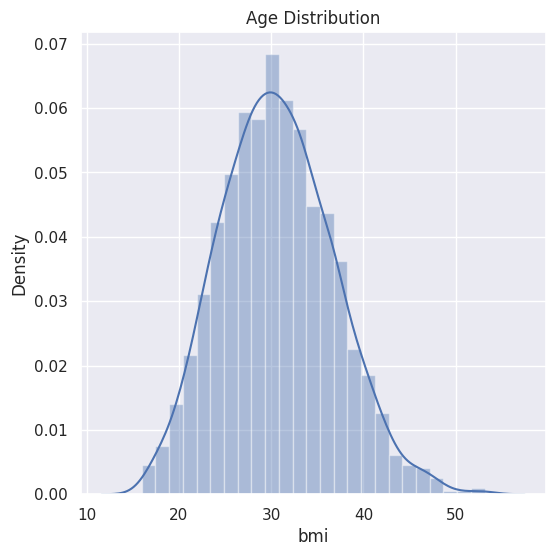

In [14]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(ins_dataset['bmi'])
plt.title('Age Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

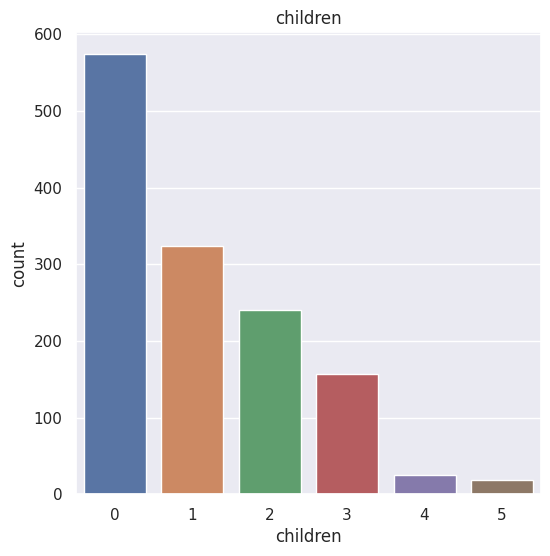

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x = 'children' , data=ins_dataset)
plt.title('children')
plt.show()


In [16]:
ins_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

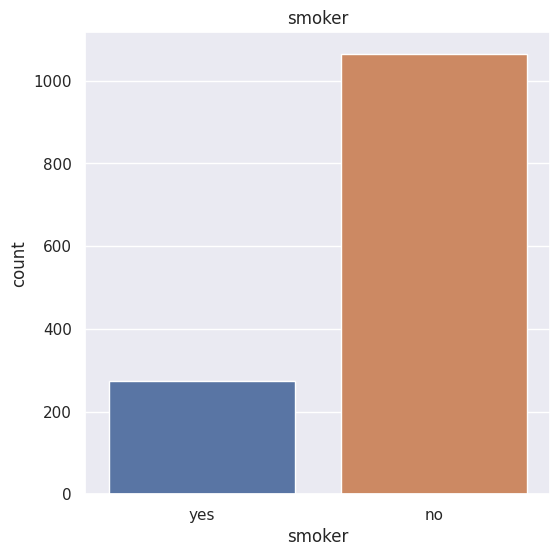

In [17]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker' , data=ins_dataset)
plt.title('smoker')
plt.show()

In [18]:
ins_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

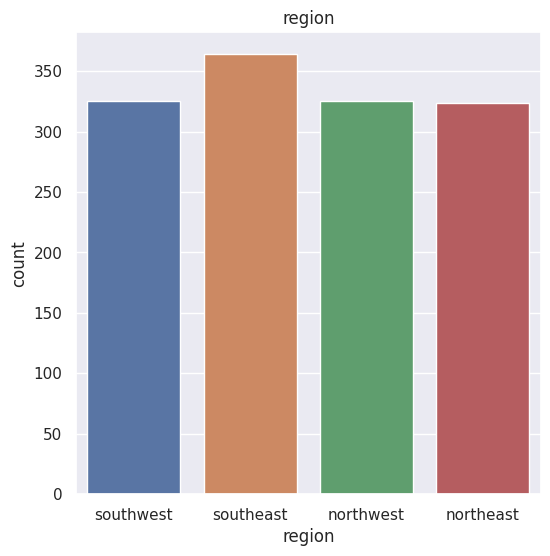

In [19]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x = 'region' , data=ins_dataset)
plt.title('region')
plt.show()

In [21]:
ins_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-23-31dfba5e8d06>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_dataset['charges'])


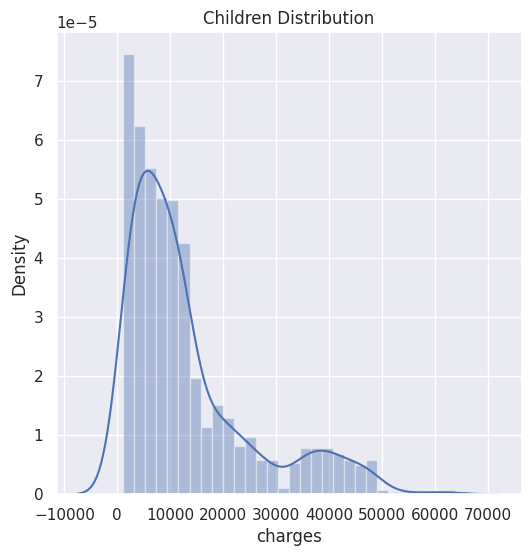

In [23]:
 # distribution of charges value
 plt.figure(figsize=(6,6))
 sns.distplot(ins_dataset['charges'])
 plt.title('Children Distribution')
 plt.show()

Data pre-processing

encoding the categorical features

In [41]:
#encoding sex column
ins_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True )

# encoding 'smoker' column
ins_dataset.replace({'smoker':{'yes':0, 'no':1}} , inplace=True)

#encoding ' region' column
ins_dataset.replace({'region':{'southwest':0, 'southeast':1, 'northeast':2 , 'northwest':3}}, inplace=True )

Splitting the Features and Target

In [42]:
X = ins_dataset.drop(columns='charges' , axis=1)
Y = ins_dataset['charges']

In [43]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


Splitting the data into Training data & Testing Data

In [44]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2)

In [45]:
print(X.shape , X_train.shape , X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Trainig

Linear Regression

In [46]:
regressor = LinearRegression()

In [47]:
regressor.fit(X_train , Y_train)

LinearRegression()

Model Evaluation

In [48]:
# prediction on training data

In [49]:
training_data_prediction = regressor.predict(X_train)

In [50]:
# R squared value
r2_train = metrics.r2_score(Y_train , training_data_prediction)
print('R squared value :' , r2_train)

R squared value : 0.7516346664929344


In [52]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [53]:
# R squared value
r2_test = metrics.r2_score (Y_test , test_data_prediction)
print( 'R squared value: ' , r2_test)

R squared value:  0.744103253976007


Building a predicitve system

In [55]:
input_data = (31,1,25.74,0,1,0)

In [57]:
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [58]:
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [60]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD' , prediction[0])

[3713.09435422]
The insurance cost is USD 3713.0943542195328


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
 # and the original cost is slighly different 3756.6216